# Les données

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

In [3]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris_data['data']
print(X.shape)

(150, 4)


In [5]:
y = iris_data['target']

## Analyse du dataset

In [6]:
import matplotlib.pyplot as plt

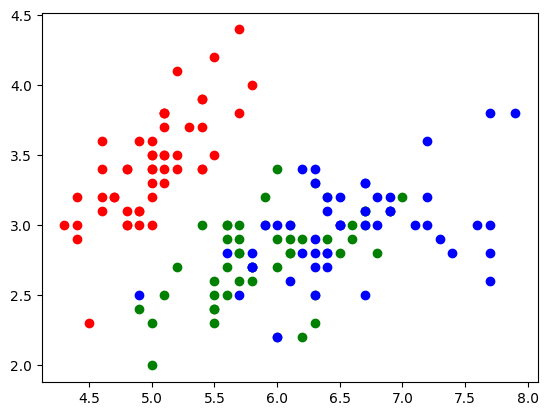

In [7]:
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], color='red')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], color='green')
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], color='blue')

## Nettoyage du dataset

In [8]:
import numpy as np
print(f'Le dataset contient {np.isnan(X).sum()} données nulles')

Le dataset contient 0 données nulles


## Split train test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Entrainement d'un modèle basé sur kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
#clf = KNeighborsClassifier(n_neighbors=1)
clf = LogisticRegression()

In [28]:
clf.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred_test = clf.predict(X_test)

In [30]:
for i in range(len(y_pred_test)):
    print(str(y_pred_test[i]) + ' vs ' + str(y_test[i]))

1 vs 1
0 vs 0
0 vs 0
0 vs 0
2 vs 2
0 vs 0
0 vs 0
1 vs 1
1 vs 1
1 vs 2
1 vs 1
1 vs 1
2 vs 2
1 vs 1
1 vs 1
2 vs 2
1 vs 1
2 vs 2
2 vs 2
1 vs 1
2 vs 2
0 vs 0
1 vs 1
2 vs 2
2 vs 2
2 vs 2
0 vs 0
2 vs 2
1 vs 1
0 vs 0
0 vs 0
1 vs 2
1 vs 2
0 vs 0
2 vs 2
1 vs 1
0 vs 0
2 vs 2


## Evaluation du modèle

### Accuracy score

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [33]:
print(f'Train accuracy = {accuracy_score(y_train, y_pred_train)}')
print(f'Test accuracy = {accuracy_score(y_test, y_pred_test)}')

Train accuracy = 0.9732142857142857
Test accuracy = 0.9210526315789473


### Matrice de confusion et autres métriques

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

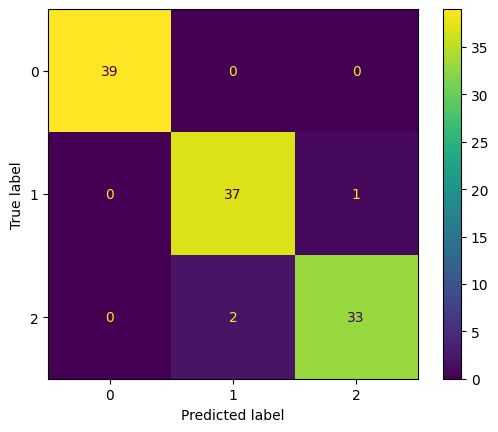

In [35]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)

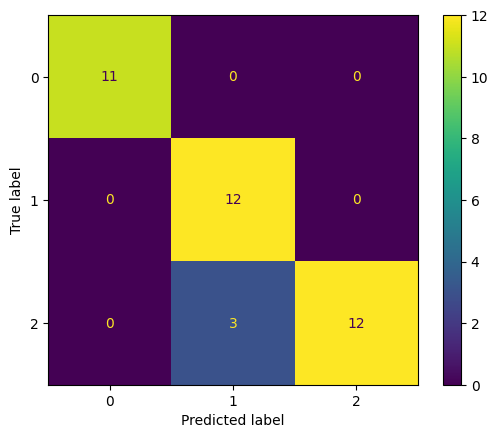

In [36]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [37]:
from sklearn.metrics import precision_score, recall_score
fscore = precision_score(y_test, y_pred_test, average='weighted')
print(f'Precision = {fscore}')
rscore = recall_score(y_test, y_test, average='weighted')
print(f'Recall = {rscore}')

Precision = 0.9368421052631579
Recall = 1.0
